<a href="https://colab.research.google.com/github/the-astronot/intro_to_ai/blob/main/Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1


# Pre-Reqs

Here, I'm just getting the space ready so I can tackle the problem.

In [1]:
# import required libraries
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Quick timer
class Timer:
  def __init__(self):
    self.active = False
    self.duration = 0
    self.began = 0
  
  def start(self):
    if self.active == False:
      self.began = time.time()
      self.active = True
  
  def stop(self):
    if self.active == True:
      self.duration = time.time() - self.began
      self.active = False

  def read(self):
    if self.active == False:
      return self.duration
    return -1
  

In [3]:
t = Timer()
debug = False

## Choosing a Problem

I just finished up a summer internship at NASA working with star images, so I thought it would be fun for my first ML/AI problem to try and tackle a classifier for identifying astral bodies as stars or not stars. To me, this seemed a particularly good task for logistic regression, as all of the data should be integers/floats that fall within certain bounds, and I am attempting to use them to output a value between 0 and 1 (Not Star or Star).

## Finding a Dataset

I came across this [stellar classification](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17) dataset on Kaggle. It contains all of the measurements/observations made pertaining to observed objects, including what kind of object they are from {Galaxy, Star, Quasar}.
From this, I intend to train a model to tell whether or not the observed object is a star or not.

## Exploratory Data Analysis

In [4]:
df = pd.read_csv('star_classification.csv')
df.head(10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


I immediately notice that one of the columns is titled class, and am predicting some issues within Python using that, so I'll change it.

In [5]:
df["obj_type"] = df["class"]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
 18  obj_type     100000 non-n

# Validity Check

I performed a check to make sure there would be enough star data relative to other object types to make the learning feasible.

Text(0.5, 1.0, 'Types')

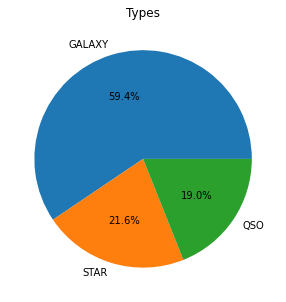

In [7]:
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(x=df.obj_type.value_counts(), 
       labels=df.obj_type.value_counts().index,
       autopct='%1.1f%%')
ax.set_title('Types')

# Pivoting

So, since stars only make up ~22% of the dataset, I pivoted to identifying Galaxies or not Galaxies. I figured since that does a better job of splitting the dataset in half, that this would be an easier task for my first model.

# Data Processing

It is readily apparent that some of these columns will be unhelpful in determining the identity of the object.

## IDS

The columns {obj_ID, run_ID, rerun_ID, field_ID, spec_obj_ID} are all for use by those making the observations and are not properties of the objects themselves

## Equipment Data

The columns {cam_col, plate, fiber_ID} are all recordings of how the data was captured, but are similarly not inherent to the object.

In [8]:
df.drop(["obj_ID","run_ID","rerun_ID","field_ID","spec_obj_ID","cam_col","plate","fiber_ID"],axis=1,inplace=True)

Let's see how it looks now.

In [9]:
df.describe()

,alpha,delta,u,g,r,i,z,redshift,MJD
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,0.576661,55588.647500
std,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,0.730707,1808.484233
min,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,-0.009971,51608.000000
25%,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,0.054517,54234.000000
50%,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,0.424173,55868.500000
75%,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,0.704154,56777.000000
max,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,7.011245,58932.000000


I'll perform a quick check for N/A or missing values in the dataset, but when I found it, it claimed that there were no empty cells.

In [10]:
df.isna()

,alpha,delta,u,g,r,i,z,class,redshift,MJD,obj_type
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False,False,False


Looks good to me.

##isGalaxy

I didn't find any missing values, so I progressed onto combining the strings for class/obj_type into a boolean based on whether or not an instance was a galaxy or not.

In [11]:
df['isGalaxy'] = 0
df.loc[df['class'] == "GALAXY", 'isGalaxy'] = 1
df.describe()

,alpha,delta,u,g,r,i,z,redshift,MJD,isGalaxy
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,0.576661,55588.647500,0.594450
std,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,0.730707,1808.484233,0.491001
min,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,-0.009971,51608.000000,0.000000
25%,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,0.054517,54234.000000,0.000000
50%,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,0.424173,55868.500000,1.000000
75%,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,0.704154,56777.000000,1.000000
max,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,7.011245,58932.000000,1.000000


While there weren't any N/A or missing rows, I noticed that the minimum here for several columns is -9999. I figured that I have enough datapoints to just toss any rows with this issue.

In [12]:
df = df[df.u > -9999.0]
df.describe()

,alpha,delta,u,g,r,i,z,redshift,MJD,isGalaxy
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,177.628653,24.135552,22.080679,20.631583,19.645777,19.084865,18.768988,0.576667,55588.653687,0.594456
std,96.502612,19.644608,2.251068,2.037384,1.854763,1.757900,1.765982,0.730709,1808.492217,0.490999
min,0.005528,-18.785328,10.996230,10.498200,9.822070,9.469903,9.612333,-0.009971,51608.000000,0.000000
25%,127.517698,5.147477,20.352410,18.965240,18.135795,17.732280,17.460830,0.054522,54234.000000,0.000000
50%,180.900527,23.646462,22.179140,21.099930,20.125310,19.405150,19.004600,0.424176,55869.000000,1.000000
75%,233.895005,39.901582,23.687480,22.123775,21.044790,20.396510,19.921120,0.704172,56777.000000,1.000000
max,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,7.011245,58932.000000,1.000000


Turns out it was just one point. 

With that done, I can drop the classes from the dataset.

In [ ]:
df.drop('class',axis=1,inplace=True)
df.drop('obj_type',axis=1,inplace=True)

## Correlation Check 
Now to take a look at the correlation of the inputs.

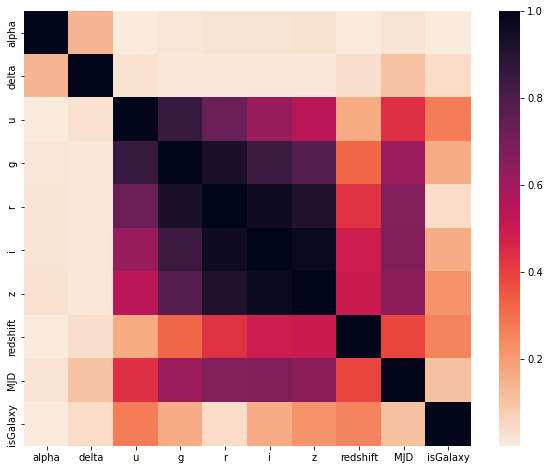

In [14]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr().abs(),annot=False, ax=ax, cmap='rocket_r')

In [15]:
df.corr()['isGalaxy'].sort_values(ascending=False)

isGalaxy    1.000000
u           0.272524
g           0.163133
alpha       0.004091
r          -0.038007
delta      -0.038312
MJD        -0.110589
i          -0.160388
z          -0.219269
redshift   -0.256938
Name: isGalaxy, dtype: float64

It's looking like the alpha and delta (Right Ascension and Declination) have no meaningful effect whatsoever on anything, least of all my target, so I suppose I might as well remove them from the inputs as well.

After some testing, it appears that I still have too many unnecessary variables, and ended up dropping r and MJD as well.

In [16]:
df.drop(["alpha","delta","r","MJD"],axis=1,inplace=True)

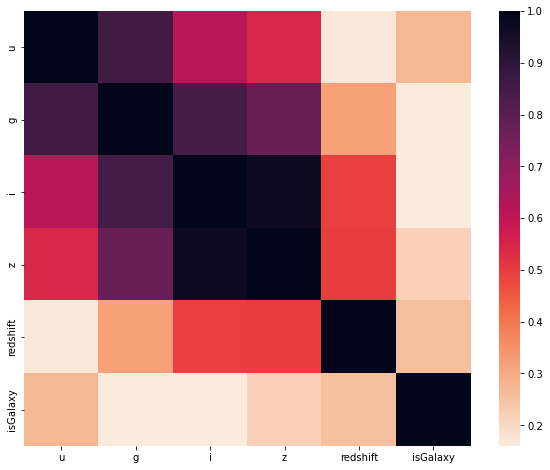

In [17]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr().abs(),annot=False, ax=ax, cmap='rocket_r')

# Partitioning the Data

In [18]:
# independent variables
x = df.drop(['isGalaxy'],axis=1)
# dependent/target
y = df.isGalaxy

In [19]:
# Separate Training and Test Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Feature Scaling

In [ ]:
transformer = Normalizer(norm='max').fit(x_train)
x_train = transformer.transform(x_train)
x_test = transformer.transform(x_test)

# Implementing Logistic Regression

In [21]:
# Rolling up a quick sigmoid function
def sigmoid(x):
  #print(x)
  return np.exp(x)/(1+np.exp(x))

# Defining the prediction function
def predict(w,X,b):
  return sigmoid(np.dot(w.T,X.T) + b).flatten().T

# Defining the cost function
def cost(m,Y,A):
  return -1/float(m) * np.sum(Y * np.log(A) + (1-Y) * (np.log(1-A)))

In [22]:
# Defining the derivative w.r.t W
def dW(X,A,Y,n):
  return np.dot(X, (A-Y).T)/n

In [23]:
# Defining the derivative w.r.t B
def dB(A,Y,n):
  return np.sum(A-Y)/n

In [24]:
# Update
def update(eta,w,b,dw,db):
  w = w - eta*dw.T
  b = b - eta*db.T
  return w,b

In [25]:
# Predict
def final_predict(w,X,b):
  y_hat = predict(w,X,b)
  if debug:
    print("Avg: {}, Std: {}".format(y_hat.mean(),y_hat.std()))
  for i in range(len(y_hat)):
    if y_hat[i] < 0.5:
      y_hat[i] = 0
    else:
      y_hat[i] = 1
  return y_hat

In [26]:
# Test
def test(x_test, y_test,w,b):
  predictions = final_predict(w,x_test,b)
  correct = 0
  if debug:
    print("Weights:")
    for weight in w:
      print(weight)
    print("BIAS:")
    print(b)
    print("Prediction:")
    print(predictions)
    print("Reality:")
    print(y_test)
  for i in range(len(predictions)):
    if predictions[i] == y_test[i]:
      correct += 1
  f1 = f1_score(y_test,predictions)
  acc = accuracy_score(y_test,predictions)
  return correct/float(len(predictions)), f1, acc

# Check and print
def finish(x_test,y_test,w,b,t,epochs):
  perc_correct, f1, acc = test(x_test,y_test.to_numpy().flatten(),w,b)
  perc_correct*=100
  t.stop()

  print("After {0} epochs over {1:.2f} seconds, the model is capable of correctly identifying GALAXIES {2:.3f}% of the time".format(epochs, t.read(), perc_correct))
  print("Accuracy: {0:.3f}\nF1: {1:3f}".format(acc, f1))

In [27]:
# Logistic Regression (Function)
def log_reg(w,x,y,b,rate,esc_val):
  y_hat = predict(w,x_train,b)
  c = cost(m,y_train,y_hat)
  dw = dW(x_train.T,y_hat,y_train,n)
  db = dB(y_hat,y_train,n)
  return (update(rate, w, b, dw, db), abs(dw.max()) < esc_val)


In [28]:
# Logistic Regression (Basic)
t.start()

epochs = 10000
n=x_train.shape[1]
m=x_train.shape[0]
rate = 0.0002
w = np.random.uniform(size=n)
b = np.random.uniform()
esc_val = 0.01
for i in range(epochs):
  (w,b),esc = log_reg(w,x_train,y_train,b,rate,esc_val)
  if esc:
    epochs = i
    break

finish(x_test,y_test,w,b,t,epochs)

After 10000 epochs over 224.03 seconds, the model is capable of correctly identifying GALAXIES 82.095% of the time
Accuracy: 0.821
F1: 0.862602


In [29]:
# Logistic Regression (Mini-Batch)
t.start()

epochs = 10000
n = x.shape[1]
rate = 0.0002
w = np.random.uniform(size=n)
b = np.random.uniform()
min_esc = 0.01
batch_size = 100
m = batch_size
start_index = 0

randomize = np.arange(m)
np.random.shuffle(randomize)
x_train_stoc = x_train[randomize]
y_train_stoc = y_train.to_numpy()[randomize]

for i in range(epochs):
  if start_index + batch_size > m:
    start_index = 0
    randomize = np.arange(m)
    np.random.shuffle(randomize)
    x_train_stoc = x_train[randomize]
    y_train_stoc = y_train.to_numpy()[randomize]
  x_batch = x_train_stoc[start_index:start_index+batch_size:1]
  y_batch = y_train_stoc[start_index:start_index+batch_size:1]
  start_index += batch_size
  (w,b),esc = log_reg(w,x_batch,y_batch,b,rate,esc_val)
  if esc:
    epochs = i
    break

finish(x_test,y_test,w,b,t,epochs)

After 10000 epochs over 211.45 seconds, the model is capable of correctly identifying GALAXIES 82.090% of the time
Accuracy: 0.821
F1: 0.862569


In [30]:
# Logistic Regression (Stochastic)
t.start()

epochs = 10
n=x_train.shape[1]
m=x_train.shape[0]
rate = 0.0002
w = np.random.uniform(size=n)
b = np.random.uniform()
esc_val = 0.01
for i in range(epochs):
  randomize = np.arange(m)
  np.random.shuffle(randomize)
  x_train_stoc = x_train[randomize]
  y_train_stoc = y_train.to_numpy()[randomize]
  for j in range(int(m/100)):
    x_data = x_train_stoc[j]
    y_data = y_train_stoc[j]
    (w,b),esc = log_reg(w,x_data,y_data,b,rate,esc_val)
    if esc:
      epochs = i+1
      break

finish(x_test,y_test,w,b,t,epochs)

After 10 epochs over 179.31 seconds, the model is capable of correctly identifying GALAXIES 81.730% of the time
Accuracy: 0.817
F1: 0.860758


# Comparison of Methods

All 3 versions of Gradient Descent ended up with approximately the same results in approximately the same amount of time. I did have to stretch SGD some to get the time to work out however, as I have just shy of 100,000 datapoints to process, and SGD is functionally like I was running it all inside a for loop. I don't get the benefits afforded to the other two of the speedy matrix algebra to the same extent.

# Optimization Algorithms

For my first optimization algorithm, I attempted to implement Momentum.

In [31]:
def momentum_update(eta,gamma,w,b,dw,db,vtw,vtb):
  vtw = vtw*gamma + eta*dw.T
  vtb = vtb*gamma + eta*db.T
  w = w - vtw
  b = b - vtb
  return w,b,vtw,vtb

def mom_log_reg(w,x,y,b,vtw,vtb,rate,esc_val):
  y_hat = predict(w,x_train,b)
  c = cost(m,y_train,y_hat)
  dw = dW(x_train.T,y_hat,y_train,n)
  db = dB(y_hat,y_train,n)
  return (momentum_update(rate, .9, w, b, dw, db,vtw,vtb), abs(dw.max()) < esc_val)


In [32]:
# Testing Momentum
t.start()
epochs = 10000
n=x_train.shape[1]
m=x_train.shape[0]
rate = 0.0002
w = np.random.uniform(size=n)
b = np.random.uniform()
esc_val = 0.01
vtw = 0.0
vtb = 0.0
for i in range(epochs):
  (w,b,vtw,vtb),esc = mom_log_reg(w,x_train,y_train,b,vtw,vtb,rate,esc_val)
  if esc:
    epochs = i+1
    break

finish(x_test,y_test,w,b,t,epochs)

After 10000 epochs over 209.87 seconds, the model is capable of correctly identifying GALAXIES 83.650% of the time
Accuracy: 0.837
F1: 0.865377


I then attempted to implement Nesterov Accelerated Gradient (NAG)

In [33]:
# NAG
def nag_update(eta,gamma,w,b,dw,db,vtw,vtb,x,y,n):
  delta_w = dW(x.T,predict(w-gamma*vtw,x,b),y,n)
  vtw = vtw*gamma + eta*delta_w.T
  vtb = vtb*gamma + eta*b
  w = w - vtw
  b = b - vtb
  return w,b,vtw,vtb

def nag_log_reg(w,x,y,b,vtw,vtb,rate,esc_val,n):
  y_hat = predict(w,x,b)
  c = cost(m,y,y_hat)
  dw = dW(x.T,y_hat,y,n)
  db = dB(y_hat,y,n)
  return (nag_update(rate, .9, w, b, dw, db,vtw,vtb,x,y,n), abs(dw.max()) < esc_val)


In [34]:
# Testing NAG
t.start()
epochs = 10000
n=x_train.shape[1]
m=x_train.shape[0]
rate = 0.0002
w = np.random.uniform(size=n)
b = np.random.uniform()
esc_val = 0.000001
vtw = 0.0
vtb = 0.0
for i in range(epochs):
  (w,b,vtw,vtb),esc = nag_log_reg(w,x_train,y_train,b,vtw,vtb,rate,esc_val,n)
  if esc or abs(vtw.max())<esc_val:
    epochs = i+1
    break

finish(x_test,y_test,w,b,t,epochs)

After 10000 epochs over 297.40 seconds, the model is capable of correctly identifying GALAXIES 82.315% of the time
Accuracy: 0.823
F1: 0.848982


# Comparison of Optimizers

Similarly to the different flavors of Gradient Descent, the 2 optimizers both terminated with approximately the same results. The Nesterov Accelerate Gradient however, consumed quite a bit more time than either the vanilla Gradient Descent or Momentum optimizer.